<a href="https://colab.research.google.com/github/Mallickbanani/bm_project/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & dataset :

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc
from statsmodels.formula.api import logit
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [96]:
housing=pd.read_csv('/content/drive/MyDrive/dataset/housing_prediction.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


##Attribute Information:

1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's


## explore data:

In [97]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [98]:
housing.shape

(506, 14)

In [99]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [100]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286379,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705489,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

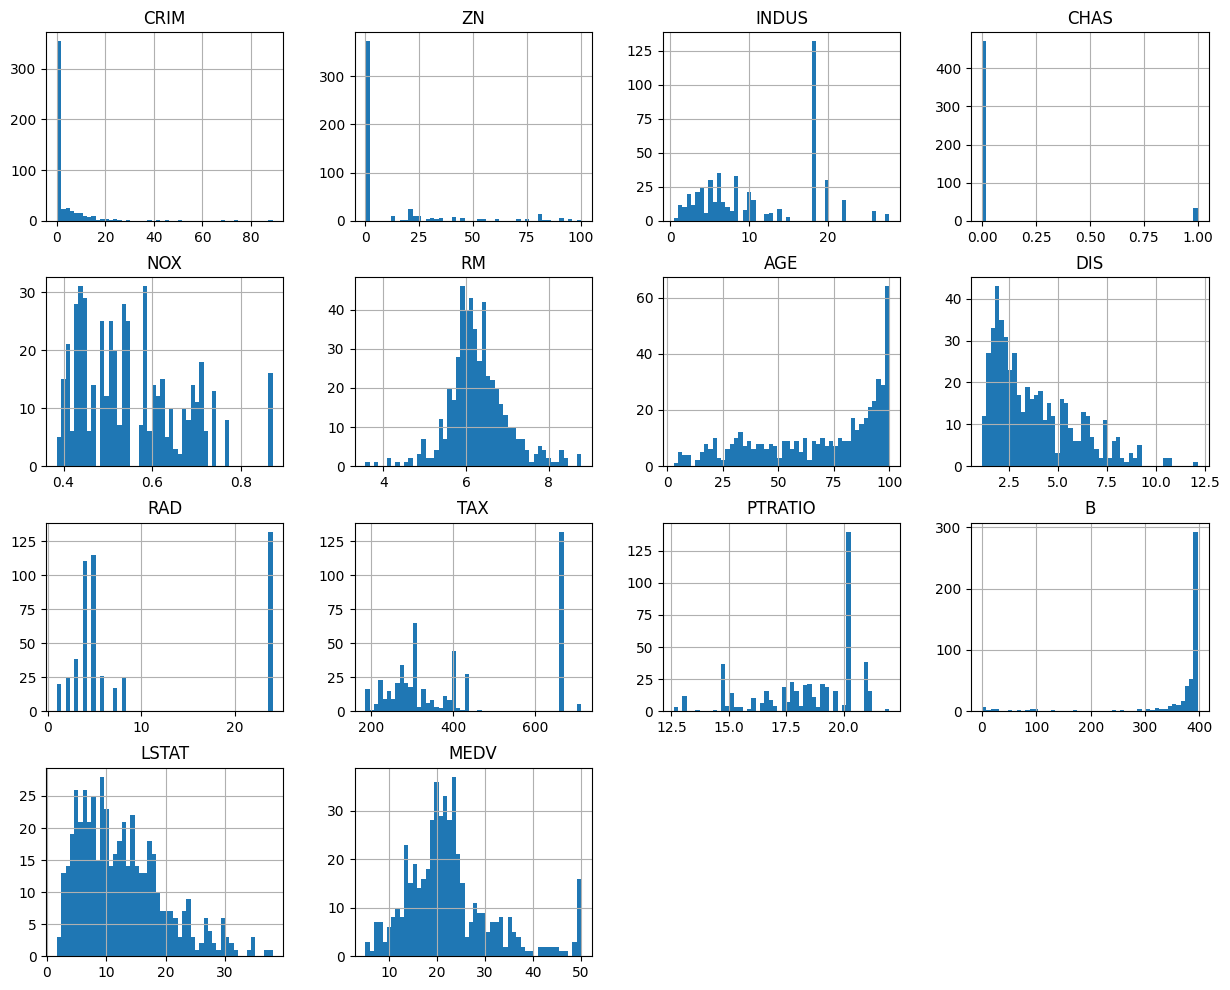

In [101]:
housing.hist(bins=50, figsize=(15,12))

## Train-Test Splitting

In [102]:
def split_train_test(data, test_ratio):
  np.random.seed(42)
  shuffled=np.random.permutation(len(data))
  #print(shuffled)
  test_set_size=int(len(data) * test_ratio)
  test_indices= shuffled[:test_set_size]
  train_indices=shuffled[test_set_size:]
  return data.iloc[train_indices],data.iloc[test_indices]

In [103]:
train_set,test_set= split_train_test(housing,0.2)

In [104]:
print(f'rows in train set: {len(train_set)}')
print(f'rows in test set: {len(test_set)}')

rows in train set: 405
rows in test set: 101


we can do the same things by sklearn model.

In [105]:
from sklearn .model_selection import train_test_split
train_set,test_set= train_test_split(housing,test_size=0.2,random_state=42)

In [106]:
print(f'rows in train set: {len(train_set)}')
print(f'rows in test set: {len(test_set)}')

rows in train set: 404
rows in test set: 102


but for the domain knowledge of data set , there CHAS very important features for prediction . so we need to split same ratio for train and test set , so for that we import StratifiedShuffleSplit.

In [107]:
from sklearn .model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
  strat_train_set= housing.loc[train_index]
  strat_test_set= housing.loc[test_index]


In [108]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [109]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [110]:
# spliting in same ration
378/28 , 95/7

(13.5, 13.571428571428571)

after doing train test split we now use only our train set

In [111]:
housing=strat_train_set.copy()

## Looking for Correlations:


In [112]:
corr_matrix=housing.corr()

In [113]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680707
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='PTRATIO', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='PTRATIO', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>,
        <Axes: xlabel='PTRATIO', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='PTRATIO', ylabel='LSTAT'>],
       [<Axes: xlabel='MEDV', ylabel='PTRATIO'>,
        <Axes: xlabel='RM', ylabel='PTRATI

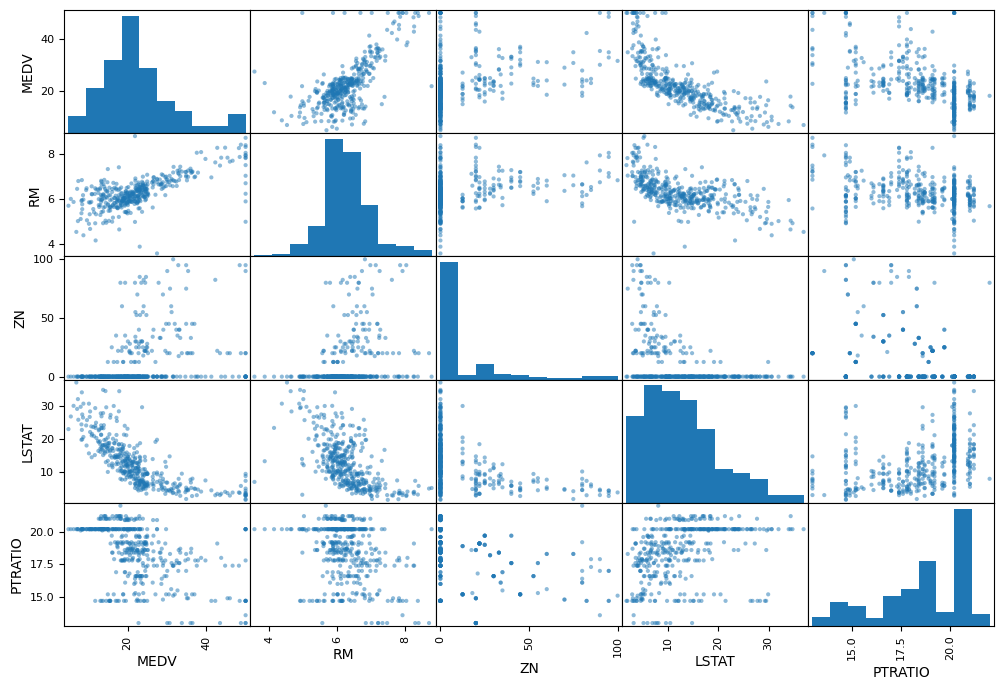

In [114]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT','PTRATIO']
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='LSTAT', ylabel='MEDV'>

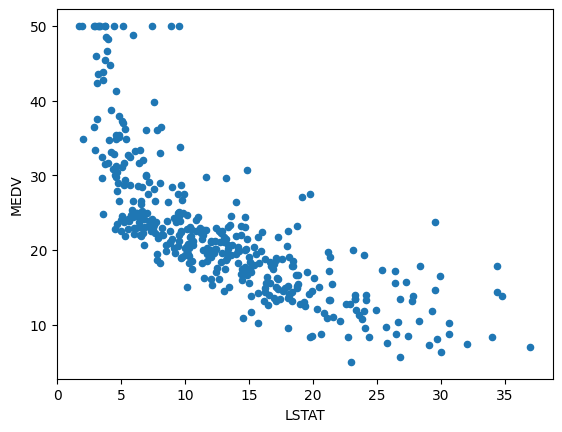

In [115]:
housing.plot(kind='scatter',x='LSTAT',y='MEDV')

## Trying out Attribution combinations

In [116]:
housing['TPR']=housing['TAX']/housing['RM'] # TPR= TAX per ROOM

In [117]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TPR
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [118]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680707
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TPR       -0.529596
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TPR', ylabel='MEDV'>

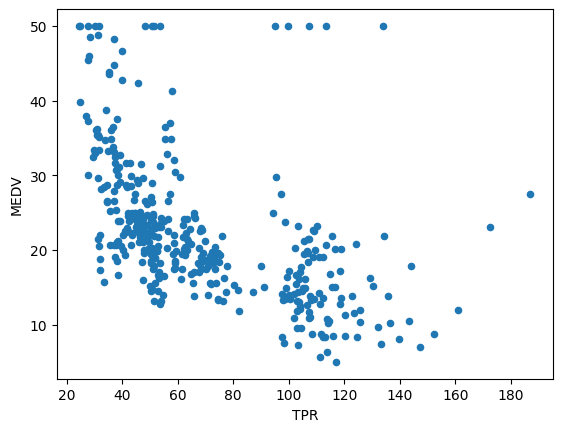

In [119]:
housing.plot(kind='scatter',x='TPR',y='MEDV')

In [120]:
# feature and target values in train set
housing = strat_train_set.drop(columns='MEDV') # features
housing_labels =strat_train_set['MEDV'].copy() # target

## Missing Attributes:

To take care of missing attributes, we have three options:
1. Get rid of the missing data points
2. Get rid of the whole attributes
3. set the value to some value (0, mean, median)

In [121]:
# option 1.
a=housing.dropna(subset=['RM'])
a.shape

(399, 13)

In [122]:
# option 2
b=housing.drop('RM',axis=1)
b.head()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15


in both cases original dataframe 'housing' remain unchanged

In [123]:
# option 3
median= housing['RM'].median()
median

6.211

In [124]:
housing['RM'].fillna(median)   # original dataframe 'housing' remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [125]:
housing.describe() # before we started filling attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282040,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716679,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.633000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [126]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [127]:
imputer.statistics_ # it shows the every column's median values

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [128]:
x= imputer.transform(housing)

In [129]:
housing_transform=pd.DataFrame(x,columns=housing.columns)

In [130]:
housing_transform.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281161,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712263,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily , three types of objects:
1. Estimators
2. Transformers
3. Predictors

## Feature Scalling

primarily , two types of feature scaling methods:
1. Min-max scalling (normalization) = (value - min) / (max-min)

   sklearn provides a class called MinMaxScaler for this
2. Standardization = (value - min) / std

   sklearn provides a class called Standard Scaler for this


## Creating Pipeline

In [131]:
from sklearn.pipeline import Pipeline
from sklearn . preprocessing import StandardScaler
my_pipeline= Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])

In [132]:
housing_num_tr=my_pipeline.fit_transform(housing_transform)

In [133]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [134]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for House_price

### LinearRegression

In [135]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(housing_num_tr,housing_labels)

LinearRegression()

#### Evaluating the model:

In [156]:
prepared_data= my_pipeline.transform(housing)

In [157]:
from sklearn.metrics import mean_squared_error
housing_predict=model.predict(housing_num_tr)
lin_mse= mean_squared_error(housing_labels,housing_predict)
lin_rmse=np.sqrt(lin_mse)

In [158]:
lin_mse , lin_rmse

(23.343715259629754, 4.831533427353034)

In [139]:
model.predict(my_pipeline.transform(housing.iloc[:5]))

array([23.94614063, 27.20132647, 20.57761312, 25.0227542 , 23.74561776])

### Decision Tree

In [140]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor()
model1.fit(housing_num_tr,housing_labels)

DecisionTreeRegressor()

In [141]:
prepared_data= my_pipeline.transform(housing)

In [142]:
from sklearn.metrics import mean_squared_error
housing_predict=model1.predict(housing_num_tr)
mse= mean_squared_error(housing_labels,housing_predict)
rmse=np.sqrt(mse)
mse ,rmse

(0.0, 4.831533427353034)

### Random Forest

In [148]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [149]:
prepared_data= my_pipeline.transform(housing)

In [150]:
from sklearn.metrics import mean_squared_error
housing_predict=model2.predict(housing_num_tr)
ran_mse= mean_squared_error(housing_labels,housing_predict)
ran_rmse=np.sqrt(ran_mse)
ran_mse ,ran_rmse

(1.3967002821782162, 1.1818207487509331)

## Using better evalution technique _ Cross Validation:

In [143]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(model1, housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_score=np.sqrt(-score)
rmse_score ## for Decision Tree

array([4.10508311, 5.66497584, 5.44977064, 3.95202943, 4.18123785,
       3.38419119, 5.11676167, 3.64948627, 3.14948408, 3.51717216])

In [159]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(model, housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_score=np.sqrt(-score)
lin_rmse_score  ## for Linear Regression

array([4.22166294, 4.25266399, 5.09327758, 3.82223832, 5.34231908,
       4.41061482, 7.47547392, 5.48574793, 4.15607087, 6.07303178])

In [145]:
def print_score(score):
  print("score : ",score)
  print("mean : ", score.mean())
  print("std : ",score.std())

In [152]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(model2, housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
ran_rmse_score=np.sqrt(-score)
ran_rmse_score  ## for Random forest Regression

array([2.83573557, 2.78176931, 4.4176831 , 2.67994524, 3.29547076,
       2.65438549, 4.74804649, 3.26745253, 3.33707142, 3.13269135])

In [160]:
def print_score(score):
  print("score : ",score)
  print("mean : ", score.mean())
  print("std : ",score.std())

In [146]:
print_score(rmse_score)  ## Decision tree

score :  [4.10508311 5.66497584 5.44977064 3.95202943 4.18123785 3.38419119
 5.11676167 3.64948627 3.14948408 3.51717216]
mean :  4.217019223066755
std :  0.8458684203116882


In [161]:
print_score(lin_rmse_score)  ## Linear Regression

score :  [4.22166294 4.25266399 5.09327758 3.82223832 5.34231908 4.41061482
 7.47547392 5.48574793 4.15607087 6.07303178]
mean :  5.033310122695183
std :  1.0602424397597605


In [155]:
print_score(ran_rmse_score) ## random forest

score :  [2.83573557 2.78176931 4.4176831  2.67994524 3.29547076 2.65438549
 4.74804649 3.26745253 3.33707142 3.13269135]
mean :  3.3150251251614096
std :  0.6826150757357672


so Decision Tree model is better than linear regression and random forest

## Model Testing:

In [169]:
X_test = strat_test_set.drop('MEDV',axis=1)
Y_test= strat_test_set['MEDV'].copy()
x_test_prepared = my_pipeline.transform(X_test)
final_prediction = model1.predict(x_test_prepared)
final_mse = mean_squared_error( Y_test, final_prediction)
final_rmse=np.sqrt(final_mse)

In [170]:
final_rmse

4.511216956805841